[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/180130_linear_regression.ipynb)

In [0]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


# Linear Regression

## Artificial dataset

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# hyper parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

In [0]:
# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

In [0]:
# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

In [0]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [0]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
# train the model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))

Epoch [10/100], Loss: 0.5004
Epoch [20/100], Loss: 0.4987
Epoch [30/100], Loss: 0.4970
Epoch [40/100], Loss: 0.4953
Epoch [50/100], Loss: 0.4937
Epoch [60/100], Loss: 0.4920
Epoch [70/100], Loss: 0.4903
Epoch [80/100], Loss: 0.4887
Epoch [90/100], Loss: 0.4871
Epoch [100/100], Loss: 0.4854


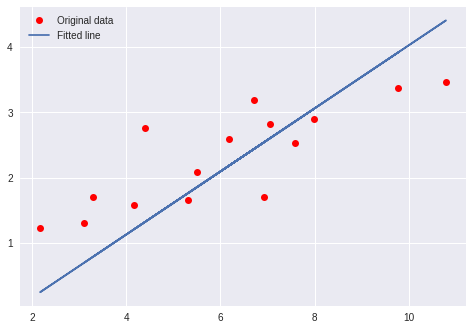

In [0]:
# plot the graph
with torch.no_grad():
    predicted = model(torch.from_numpy(x_train)).numpy()

plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Boston house price dataset

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [0]:
# hyper parameters
input_size = 13
output_size = 1
num_epochs = 5000
learning_rate = 0.01

In [0]:
boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
model

LinearRegression(
  (linear): Linear(in_features=13, out_features=1, bias=True)
)

In [0]:
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float().view(-1, 1)
    
    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).float().view(-1, 1)
    
    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    return val_loss.item()

In [0]:
# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    # data shuffle
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 200 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

epoch 0, loss: 582.3618 val_loss: 594.8526
epoch 200, loss: 444.7294 val_loss: 469.4695
epoch 400, loss: 363.5700 val_loss: 391.2282
epoch 600, loss: 298.8455 val_loss: 326.9878
epoch 800, loss: 244.5678 val_loss: 271.6202
epoch 1000, loss: 198.6342 val_loss: 224.0062
epoch 1200, loss: 160.0290 val_loss: 183.6686
epoch 1400, loss: 127.9497 val_loss: 149.9395
epoch 1600, loss: 101.6536 val_loss: 122.0816
epoch 1800, loss: 80.4387 val_loss: 99.3845
epoch 2000, loss: 63.6372 val_loss: 81.1815
epoch 2200, loss: 50.6156 val_loss: 66.8461
epoch 2400, loss: 40.7738 val_loss: 55.7890
epoch 2600, loss: 33.5496 val_loss: 47.4592
epoch 2800, loss: 28.4233 val_loss: 41.3460
epoch 3000, loss: 24.9255 val_loss: 36.9861
epoch 3200, loss: 22.6440 val_loss: 33.9697
epoch 3400, loss: 21.2306 val_loss: 31.9464
epoch 3600, loss: 20.4050 val_loss: 30.6295
epoch 3800, loss: 19.9537 val_loss: 29.7958
epoch 4000, loss: 19.7247 val_loss: 29.2800
epoch 4200, loss: 19.6179 val_loss: 28.9671
epoch 4400, loss: 19.

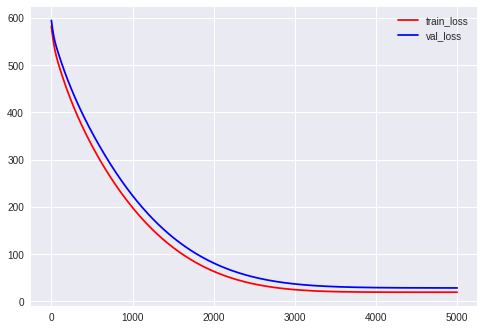

In [0]:
# plot learning curve
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()